<a href="https://www.kaggle.com/code/andrewtoh78/market-basket-analysis-apriori-eclat-fp-growth?scriptVersionId=156088393" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="background-color : midnightblue; padding : 10pt; font-size: 28pt; font-family: robotosans; color: white; font-weight: bold">Market Basket Analysis using<br>Apriori  .  Eclat  .  FP-Growth Algorithms</div>

**Market Basket Analysis (MBA) is a data mining technique** used to **discover purchasing patterns** by analyzing extensive volume of transaction data. Primarily used in retail to understand customer purchase behavior, MBA helps in product placement, promotion strategies, and inventory management. The main objective is to **detect "IF-THEN" patterns**, find **correlations between different items purchased together**, using methods such as **Association Rule Learning**. By leveraging these techniques, retailers can extract meaningful insights from customer purchase data, leading to optimized decision-making in marketing, sales, and product management. For example : if a customer buys 'milk', then the customer is likely to buy 'bread'.</span>

In [1]:
!pip install graphviz

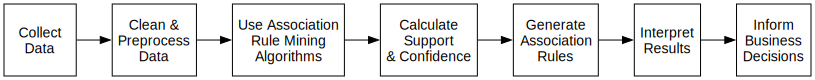

In [2]:
from IPython import display
from graphviz import Digraph

dot = Digraph(comment='Market Basket Analysis Process')
dot.attr(rankdir='LR')
node_attr = {'shape': 'box', 'height': '1', 'fontsize': '14', 'fontname': 'Arial'}
dot.attr('node', **node_attr)
dot.node('A', '  Collect  \nData')
dot.node('B', 'Clean &\nPreprocess\nData')
dot.node('C', 'Use Association\nRule Mining\nAlgorithms')
dot.node('D', 'Calculate\nSupport\n& Confidence')
dot.node('E', 'Generate\nAssociation\nRules')
dot.node('F', 'Interpret\nResults')
dot.node('G', 'Inform\nBusiness\nDecisions')

dot.edges(['AB', 'BC', 'CD', 'DE', 'EF', 'FG'])
display.display_svg(dot)

| **Process** |**Description** |
|:--- |:--- |
| **Collect Data** | The foundation of Market Basket Analysis is the collection of customer transaction data. This data typically includes key details such as the items purchased in each transaction, the time and date of purchase, and other relevant customer and transaction information. The richness and accuracy of this data are crucial, as they form the basis for all subsequent analysis and insights.|
| **Preprocess Data** | Data cleaning and preprocessing are critical steps to ensure the quality and usability of the transaction data. This phase involves removing irrelevant information that does not contribute to the analysis, such as extraneous details or erroneous entries, handling missing values, and converting/ restructuring the data into a consistent format that is compatible with the Algorithm.|
| **Use Association Rule Mining Algorithms** | Applying data mining algorithms, like Apriori or FP-Growth, to identify patterns within the data. These algorithms are designed to uncover frequent itemsets, which are groups of items that commonly appear together in transactions. These itemsets form the basis for deriving meaningful insights about customer purchasing patterns.|
| **Calculate Support and Confidence** | Two key metrics are calculated in this step: support and confidence.<br>- Support refers to the frequency of occurrence of an itemset within the dataset, indicating how common or popular a combination of items is<br>- Confidence measures the conditional probability that a specific item is purchased when another item or set of items is bought|
| **Generate Association Rules** | Based on the frequent itemsets and their corresponding support and confidence values, association rules are generated. These rules are logical statements that express the likelihood of items being purchased together. They are fundamental in understanding and leveraging the relationships unearthed in the data.|
| **Interpret Results** | Analyzing the patterns and associations identified by the Market Basket Analysis. This step is crucial for gaining insights into customer behavior and preferences. By understanding these patterns, businesses can gain a deeper understanding of how different products are interconnected in the eyes of the customers.|
| **Inform Business Decisions** | The final step is applying the insights derived from the Market Basket Analysis to inform and enhance business decisions. This can include using the findings for product recommendations, optimizing the store layout based on commonly purchased items, and developing targeted marketing campaigns. These actions can lead to increased sales, improved customer satisfaction, and more efficient store management.|


## **Association Rule Learning**
---

Association rule learning is a technique in data mining for discovering interesting relationships between variables in large datasets. The primary goal is to find frequent patterns, correlations, or associations from data sets found in various kinds of databases such as relational databases, transactional databases, and other forms of repositories. For instance, have you ever considered the [possibility of a connection between the purchase of diapers and beer](https://tdwi.org/articles/2016/11/15/beer-and-diapers-impossible-correlation.aspx)?

An association rule has two parts: **antecedent (IF)** and **consequent (THEN)**. The rule suggests that if the antecedent happens, the consequent is likely to occur as well. These rules are typically used to analyze retail basket or transaction data, but are also applicable in other areas like web usage mining, intrusion detection, and bioinformatics.

Association rules can be classified into 3 broad categories and the strength can be measured in terms of its **support** and **confidence**.
- **Trival** (everyone knows about it!) 
- **Inexplicable** (does not make any logical sense but seems to correlated)
- **Actionable** (insights that suggest a course of action) 

&nbsp;

## **Support**
---
Support (Coverage) refers to the **frequency** with which **an itemset appears in the dataset**. Ranged **between 0 and 1**, it provides an indication of how common or popular an itemset is within the given dataset, with **0 being the least common** (indicating that the itemset does not appear in any transactions) and **1 being the most common** (indicating that the itemset appears in all transactions). An itemset in the context of association rule learning is a set of one or more items that occur together in a transactional dataset.

An itemset is considered **frequent** only if the support is equal or greater than an agreed upon (user-defined) minimal value, also known as **minimum support threshold**. This principle assumes that not all item combinations are equally significant or interesting; some occur together more often than others. By focusing only the frequent itemsets, we aim to uncover the most relevant and potentially insightful patterns within the dataset.<br><br>

$$\begin{equation}
\textsf{Support}(X)=\dfrac{\textsf{Total number of transactions containing } X}{\textsf{Total number of transactions}}
\end{equation}$$


<br>For an association rule $X$ (antecedent) ⇒ $Y$ (consequent), the support is the proportion of transactions in the dataset that contain both $X$ and $Y$.<br><br>

$$\begin{equation}
\textsf{Support}(X \cup Y)=\dfrac{\textsf{Total number of transactions containing } X\textsf{ and } Y}{\textsf{Total number of transactions}}=\dfrac{(X \cup Y)}{N}
\end{equation}$$

Consider the following transaction dataset (df), where each row represents a basket or transaction with a unique Transaction ID (TID), and each column represents a unique item. The values '1' and '0' indicate whether a particular item was purchased ('1') or not ('0') in each transaction.<br><br>

| TID         | Milk | Apple | Butter | Bread | Orange | Spinach |
|:----------- |:---- |:----- |:------ |:------|:------ |:------- |
| 1           | 1    | 1     | 1      | 1     | 1      | 1       |
| 2           | 0    | 1     | 0      | 1     | 1      | 1       |
| 3           | 0    | 0     | 0      | 1     | 0      | 0       |
| 4           | 1    | 1     | 0      | 0     | 1      | 1       |
| 5           | 0    | 1     | 1      | 1     | 1      | 1       |
| 6           | 1    | 0     | 1      | 1     | 1      | 0       |
| 7           | 1    | 0     | 1      | 0     | 0      | 0       |
| 8           | 1    | 1     | 0      | 1     | 1      | 0       |
| 9           | 0    | 1     | 0      | 0     | 1      | 0       |
| 10          | 1    | 1     | 1      | 1     | 1      | 0       |

To calculate the **Support** (or frequency) for each item, we will need to count the number of transactions in which each item appears and then divide that count by the total number of transactions. Below is the Python code snippet to calculate the Support for each item in the transaction dataset.

In [3]:
# Import pandas
import pandas as pd

# Create the transaction dataframe
data = {
    "TID" : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Milk": [1, 0, 0, 1, 0, 1, 1, 1, 0, 1],
    "Apple": [1, 1, 0, 1, 1, 0, 0, 1, 1, 1],
    "Butter": [1, 0, 0, 0, 1, 1, 1, 0, 0, 1],
    "Bread": [1, 1, 1, 0, 1, 1, 0, 1, 0, 1],
    "Orange": [1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
    "Spinach": [1, 1, 0, 1, 1, 0, 0, 0, 0, 0]
}

df = pd.DataFrame(data)

# Compute the total count of transactions in the dataset
txn_count = len(df)

# Get the list of item names, excluding TID
items = df.columns.drop('TID')

# Initialize an empty list to store support values
support_values = []

# Calculate support for each item
for itemset in items:
    support_value = df[itemset].sum() / txn_count
    support_values.append((itemset, support_value))

# Convert the results into a dataframe
df_support = pd.DataFrame(support_values, columns=['Itemset', 'Support'])

# Display the results
df_support

,Itemset,Support
0,Milk,0.6
1,Apple,0.7
2,Butter,0.5
3,Bread,0.7
4,Orange,0.8
5,Spinach,0.4


In [4]:
# Finding the frequency of itemsets containing two items
# Import combinations function from itertools to generate all possible combinations
from itertools import combinations

# Compute the support for each itemset of size 2
combo2_support_values_list = []
for combo in combinations(items, 2):
    combo_support = df[list(combo)].all(axis=1).mean()
    combo2_support_values_list.append((list(combo), combo_support))

# Convert the results into a dataframe
df_combo2_support = pd.DataFrame(combo2_support_values_list, columns=['Itemset', 'Support'])

# Display the results
df_combo2_support

,Itemset,Support
0,"[Milk, Apple]",0.4
1,"[Milk, Butter]",0.4
2,"[Milk, Bread]",0.4
3,"[Milk, Orange]",0.5
4,"[Milk, Spinach]",0.2
5,"[Apple, Butter]",0.3
6,"[Apple, Bread]",0.5
7,"[Apple, Orange]",0.7
8,"[Apple, Spinach]",0.4
9,"[Butter, Bread]",0.4


In [5]:
# Finding the frequency of itemsets containing three items
# Import combinations function from itertools to generate all possible combinations
from itertools import combinations

# Compute the support for each itemset of size 3
combo3_support_values_list = []
for combo in combinations(items, 3):
    combo_support = df[list(combo)].all(axis=1).mean()
    combo3_support_values_list.append((list(combo), combo_support))

# Convert the results into a dataframe
df_combo3_support = pd.DataFrame(combo3_support_values_list, columns=['Itemset', 'Support'])

# Display the results
df_combo3_support

,Itemset,Support
0,"[Milk, Apple, Butter]",0.2
1,"[Milk, Apple, Bread]",0.3
2,"[Milk, Apple, Orange]",0.4
3,"[Milk, Apple, Spinach]",0.2
4,"[Milk, Butter, Bread]",0.3
5,"[Milk, Butter, Orange]",0.3
6,"[Milk, Butter, Spinach]",0.1
7,"[Milk, Bread, Orange]",0.4
8,"[Milk, Bread, Spinach]",0.1
9,"[Milk, Orange, Spinach]",0.2


Combining the support for both single-item, two-item and three-item itemsets, and assuming itemsets are only considered frequent if they exist in 50% of the transactions i.e. **minimum suport threshold = 0.5**, we are left with ten itemsets that meet or exceed this threshold. These frequent itemsets will be our main focus in identifying the key patterns and trends in consumer purchasing behaviour, providing valuable insights for strategic decision-making in areas such as product placement, marketing and promotions, and inventory optimization.

In [6]:
# Combining both single-item and two-item itemsets
df_support_combined = pd.concat([df_support, df_combo2_support, df_combo3_support])

# Define minimum support threshold
min_support_threshold = 0.5

# Drop itemsets with support less than or equal to 0.5
df_support_final = df_support_combined[df_support_combined['Support'] >= min_support_threshold]

# Display the results
df_support_final

,Itemset,Support
0,Milk,0.6
1,Apple,0.7
2,Butter,0.5
3,Bread,0.7
4,Orange,0.8
3,"[Milk, Orange]",0.5
6,"[Apple, Bread]",0.5
7,"[Apple, Orange]",0.7
12,"[Bread, Orange]",0.6
13,"[Apple, Bread, Orange]",0.5


## **Establish Association Rules**
---
With the frequent itemsets, we can now formulate potential association rules $(X \Rightarrow Y)$. These rules are structured as if-then statements and are instrumental in evaluating the probability of relationships between different items within the dataset.

Since an association rule requires and is defined by an antecedent and a consequent, it can only be generated for itemsets that contain **at least two items**.

In [7]:
lift_values = []
# Calculate lift for two-item itemsets
for index, row in df_support_final.iterrows():
    if isinstance(row['Itemset'], list) and len(row['Itemset']) == 2:
        item1, item2 = row['Itemset']
        support_item1 = df_support[df_support['Itemset'] == item1]['Support'].values[0]
        support_item2 = df_support[df_support['Itemset'] == item2]['Support'].values[0]
        lift = (row['Support']) / ((support_item1)*(support_item2))
        lift_values.append({'Rule': f'[{item1}, {item2}]', 'Lift': lift})

# Calculate lift for three-item itemsets
for index, row in df_support_final.iterrows():
    if isinstance(row['Itemset'], list) and len(row['Itemset']) == 3:
        item1, item2, item3 = row['Itemset']
        support_item1 = df_support[df_support['Itemset'] == item1]['Support'].values[0]
        support_item2 = df_support[df_support['Itemset'] == item2]['Support'].values[0]        
        support_item3 = df_support[df_support['Itemset'] == item3]['Support'].values[0]        
        lift = (row['Support']) / ((support_item1)*(support_item2)*(support_item3))
        lift_values.append({'Rule': f'[{item1}, {item2}, {item3}]', 'Lift': lift})

# Convert the results into a DataFrame
df_lift = pd.DataFrame(lift_values, columns=['Rule', 'Lift'])

# Display the results
df_lift

,Rule,Lift
0,"[Milk, Orange]",1.041667
1,"[Apple, Bread]",1.020408
2,"[Apple, Orange]",1.250000
3,"[Bread, Orange]",1.071429
4,"[Apple, Bread, Orange]",1.275510


There is a slight to moderate positive association between the frequent two and three-item itemsets, indicating that the co-occurrence of these items in transactions is more frequent (lift > 1) than what would be expected by chance.

Association Rule Learning is a powerful technique for uncovering valuable insights from transactional data, enabling the discovery of interesting patterns and relationships among items. To tackle complex datasets and real-world scenarios, there are advanced algorithms such as **Apriori**, **Eclat**, and **FP-growth** that we can leverage on to assist in finding frequent itemsets, and uncover hidden associations, and optimize decision-making processes.

## **Confidence**
---
Confidence is a measure of how often items in $Y$ appear in transactions that contain $X$. Statistically, it is the **conditional probability** that a transaction **containing the antecedent also contains the consequent**.<br><br> 

$$\begin{equation}
\textsf{Confidence}(X \Rightarrow Y)={\textsf{P}(Y|X)}
\end{equation}$$

Mathematically, it can be expressed as the **ratio of the support of the combined itemset** (both X and Y together) **$to the support of the antecedent itemset**.<br><br>

$$\begin{equation}
\textsf{Confidence}(X \Rightarrow Y)=\dfrac{\textsf{Support}(X \cup Y)}{\textsf{Support}(X)}
\end{equation}$$

&nbsp;

Confidence is a crucial metric in association rule mining as it indicates the **strength of the relationship** in an association rule. Similar to support, confidence values are also within the **range of 0 and 1**. A higher confidence value implies a stronger likelihood that customers who purchase item X will also purchase item Y, indicating a stronger association between the two items.
- Confidence of 0 :  Indicates no observed association between items X and Y. In other words, if customers buy item X, there is NO confidence that they will also buy item Y.
- Confidence of 1 : Indicates a perfect association between items X and Y. If customer buy item X, it is guaranteed that they will also buy item Y.<br><br>

Confidence values are computed specifically from the **association rules** generated **from the frequent itemsets**. Each rule ($X \Rightarrow Y$) has its own confidence value, which is calculated using the support values obtained from the data. This makes confidence a rule-specific metric, providing insights into the strength of individual rules derived from the dataset. Confidence also typically operates under a **minimum confidence threshold**. This threshold is a **user-defined** limit set to distinguish and focus only those association rules that are deemed interesting and are most likely to be meaningful and actionable.


In [8]:
confidence_values = [] 
# Calculate confidence for two-item itemsets
for index, row in df_support_final.iterrows():
    if isinstance(row['Itemset'], list) and len(row['Itemset']) == 2:
        item1, item2 = row['Itemset']
        support_item1 = df_support[df_support['Itemset'] == item1]['Support'].values[0]
        support_item2 = df_support[df_support['Itemset'] == item2]['Support'].values[0]

        # Rule : item1 → item2
        confidence1 = row['Support'] / support_item1
        confidence_values.append({'Rule': f'{item1} → {item2}', 'Confidence': confidence1})

        # Rule : item2 → item1
        confidence2 = row['Support'] / support_item2
        confidence_values.append({'Rule': f'{item2} → {item1}', 'Confidence': confidence2})

# Calculate confidence for three-item itemsets
for index, row in df_support_final.iterrows():
    if isinstance(row['Itemset'], list) and len(row['Itemset']) == 3:
        item1, item2, item3 = row['Itemset']

        # Finding support for the combination of two items from the three-item itemset
        support_combo1 = df_support_final[df_support_final['Itemset'].apply(lambda x: set([item1, item2]).issubset(set(x)))]['Support'].values[0]
        support_combo2 = df_support_final[df_support_final['Itemset'].apply(lambda x: set([item2, item3]).issubset(set(x)))]['Support'].values[0]
        support_combo3 = df_support_final[df_support_final['Itemset'].apply(lambda x: set([item1, item3]).issubset(set(x)))]['Support'].values[0]

        # Calculate confidence for the rules
        confidence1 = row['Support'] / support_combo1
        confidence2 = row['Support'] / support_combo2
        confidence3 = row['Support'] / support_combo3

        # Append the rules
        confidence_values.append({'Rule': f'{item1}, {item2} → {item3}', 'Confidence': confidence1})
        confidence_values.append({'Rule': f'{item2}, {item3} → {item1}', 'Confidence': confidence2})
        confidence_values.append({'Rule': f'{item1}, {item3} → {item2}', 'Confidence': confidence3})

# Convert the results into a dataframe
df_confidence = pd.DataFrame(confidence_values, columns=['Rule', 'Confidence'])

# Display the results
df_confidence

,Rule,Confidence
0,Milk → Orange,0.833333
1,Orange → Milk,0.625000
2,Apple → Bread,0.714286
3,Bread → Apple,0.714286
4,Apple → Orange,1.000000
5,Orange → Apple,0.875000
6,Bread → Orange,0.857143
7,Orange → Bread,0.750000
8,"Apple, Bread → Orange",1.000000
9,"Bread, Orange → Apple",0.833333


The above code snippet will return a table showing the confidence values for the frequent itemsets. For example, when customers purchase Milk, there is a 83.3% likelihood that they will also buy Orange and when customers purchase Apple and Bread, it is guaranteed they will also buy Orange.

## **Lift**
---
Lift is a measure of **how much more often two items are bought together** than what **would be expected if their occurrences were entirely independent**. It is used to assess the **significance and strength of the association** between two sets of items.

Mathematically, lift can be expressed as the ratio of the observed joint probability of both X and Y occurring together to the expected joint probability if they were independent.<br><br> 

$$\begin{equation}
\textsf{Lift}(X \Rightarrow Y)=\dfrac{\textsf{Support}(X \cup Y)}{\textsf{Support}(X) \textsf{ x } \textsf{Support}(Y)}
\end{equation}$$

- Lift > 1 : Indicates that items X and Y appear together in transactions more often than expected by chance. This suggests a positive association between the two items. In practical terms, knowing that X is present increases the likelihood of finding Y, and vice versa.
- Lift = 1: Implies that items X and Y are independent of each other, meaning their co-occurrence is as expected based on their individual frequencies.
- Lift < 1: Suggests that items X and Y appear together less often than expected by chance. This indicates a negative association or a repulsion between the two items. Knowing that X is present reduces the likelihood of finding Y, and vice versa.<br><br>

In essence, lift helps us understand whether there is a meaningful and non-random relationship between itemsets. It's a valuable metric for tasks like market basket analysis, where the objective is to identify significant item associations and make recommendations based on these associations.


In [9]:
lift_values = []
# Calculate lift for two-item itemsets
for index, row in df_support_final.iterrows():
    if isinstance(row['Itemset'], list) and len(row['Itemset']) == 2:
        item1, item2 = row['Itemset']
        support_item1 = df_support[df_support['Itemset'] == item1]['Support'].values[0]
        support_item2 = df_support[df_support['Itemset'] == item2]['Support'].values[0]
        lift = (row['Support']) / ((support_item1)*(support_item2))
        lift_values.append({'Rule': f'[{item1}, {item2}]', 'Lift': lift})

# Calculate lift for three-item itemsets
for index, row in df_support_final.iterrows():
    if isinstance(row['Itemset'], list) and len(row['Itemset']) == 3:
        item1, item2, item3 = row['Itemset']
        support_item1 = df_support[df_support['Itemset'] == item1]['Support'].values[0]
        support_item2 = df_support[df_support['Itemset'] == item2]['Support'].values[0]        
        support_item3 = df_support[df_support['Itemset'] == item3]['Support'].values[0]        
        lift = (row['Support']) / ((support_item1)*(support_item2)*(support_item3))
        lift_values.append({'Rule': f'[{item1}, {item2}, {item3}]', 'Lift': lift})

# Convert the results into a DataFrame
df_lift = pd.DataFrame(lift_values, columns=['Rule', 'Lift'])

# Display the results
df_lift

,Rule,Lift
0,"[Milk, Orange]",1.041667
1,"[Apple, Bread]",1.020408
2,"[Apple, Orange]",1.250000
3,"[Bread, Orange]",1.071429
4,"[Apple, Bread, Orange]",1.275510


There is a slight to moderate positive association between the frequent two and three-item itemsets, indicating that the co-occurrence of these items in transactions is more frequent (lift > 1) than what would be expected by chance.

Association Rule Learning is a powerful technique for uncovering valuable insights from transactional data, enabling the discovery of interesting patterns and relationships among items. To tackle complex datasets and real-world scenarios, there are advanced algorithms such as **Apriori**, **Eclat**, and **FP-growth** that we can leverage on to assist in finding frequent itemsets, and uncover hidden associations, and optimize decision-making processes.

## **Apriori Algorithm**
---
The Apriori algorithm, introduced by R. Agrawal and R. Srikant in 1994, is a classic algorithm in data mining used for mining frequent itemsets and discovering association rules in a database. This page aims to provide an overview of the Apriori algorithm, its method, key parameters, advantages, limitations, and a basic implementation guide using Python.

The Apriori algorithm operates by identifying frequent itemsets in a dataset and then extending them to larger itemsets, provided they appear sufficiently frequently in the database. It explores the itemset space in a breadth-first manner. Initially, it identifies frequent itemsets of size 1, then uses these to generate candidate itemsets of size 2, and so on, progressively increasing the size of itemsets and checking their support.

A key principle of Apriori is that **a subset of a frequent itemset must also be frequent**. For instance, if the itemset {A, B, C} is frequent, it implies that all of its subsets, such as {A, B}, {A, C}, {B, C}, {A}, {B}, and {C}, must also be frequent. This is because any transaction containing {A, B, C} also contains all its subsets. This principle efficiently reduces the number of support calculations needed and speeds up the discovery of association rules in large datasets.

### **Key Parameters**
| **Parameter**             | **Description**                                                               |
|:--------------------------|:------------------------------------------------------------------------------|
| `min_support`             | This is the user-defined threshold (a decimal between 0 and 1) that determines the minimum frequency at which an itemset must be present in the dataset to be considered 'frequent'.|
| `confidence_threshold`    | This is the user-defined minimum level of confidence that an association rule must exceed to be considered significant.
| `lift_threshold`          | This is the user-defined minimum lift value (typically >1) focusing on rules that have a positive relationship between the antecedent and consequent.|


In [10]:
# Install machine learning extensions (mlxtend) library
!pip install mlxtend

In [11]:
# Load dataset and view first 5 rows
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
warnings.filterwarnings("ignore", category=Warning)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

df = pd.read_csv("/kaggle/input/market-basket-optimisation/Market_Basket_Optimisation.csv", header=None, index_col=None, names=[f"Item_{i}" for i in range(1, 21)])
df.head()

,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,Item_8,Item_9,Item_10,Item_11,Item_12,Item_13,Item_14,Item_15,Item_16,Item_17,Item_18,Item_19,Item_20
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# View shape of the dataset
print(f"The dataset contains {df.shape[0]} transactions and each transaction has a maximum of {df.shape[1]} items or less.")

The dataset contains 7501 transactions and each transaction has a maximum of 20 items or less.


In [13]:
# Generate transaction lists
txns = df.fillna("").values.tolist()
txns = [[item for item in txn if item != ''] for txn in txns]
txns = [[item.strip() for item in txn] for txn in txns]

# Create a list of unique ids for the transactions
ids = [i + 1 for i in range(len(txns))]

# Initialize an empty list
data =[]
# Iterate through transactions and add them to the DataFrame with IDs
for i, txn in enumerate(txns):
    data.extend([{'TID': ids[i], 'Item': item} for item in txn])

df_txn = pd.DataFrame(data)
df_txn.head(25)

,TID,Item
0,1,shrimp
1,1,almonds
2,1,avocado
3,1,vegetables mix
4,1,green grapes
5,1,whole weat flour
6,1,yams
7,1,cottage cheese
8,1,energy drink
9,1,tomato juice


In [14]:
# Perform one hot encoding using TransactionEncoder
from mlxtend.preprocessing import TransactionEncoder

# Create a TransactionEncoder
te = TransactionEncoder()

# Fit and transform the transaction data
te_array = te.fit(txns).transform(txns)

# Extract the column names
te_columns = te.columns_

# Create a DataFrame from the one-hot encoded array
df1 = pd.DataFrame(te_array, columns=te.columns_)

# Display the results
df1.head()

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,escalope,extra dark chocolate,flax seed,french fries,french wine,fresh bread,fresh tuna,fromage blanc,frozen smoothie,frozen vegetables,gluten free bar,grated cheese,green beans,green grapes,green tea,ground beef,gums,ham,hand protein bar,herb & pepper,honey,hot dogs,ketchup,light cream,light mayo,low fat yogurt,magazines,mashed potato,mayonnaise,meatballs,melons,milk,mineral water,mint,mint green tea,muffins,mushroom cream sauce,napkins,nonfat milk,oatmeal,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

The output of the above code snippet provides a binary representation of the transaction data. Each row represents a transaction, and each column corresponds to an item. If an item is present in a transaction, the corresponding cell value will be indicated as True; otherwise, it will be False. This **one-hot encoded** format is commonly used for various data mining tasks, including association rule mining. This is also the required format when using the Apriori alogrithm in identifying frequent itemsets and association rules.

In [15]:
# Find the top most frequent items
top_items = df_txn['Item'].value_counts().reset_index()

# Convert the top items into DataFrame and sort by item count in descending order
df_top_items = pd.DataFrame(top_items)
df_top_items.columns = ['Item', 'Count']

# Calculate the percentage of transactions for each item
total_transactions = len(df)
df_top_items['% Count'] = (df_top_items['Count']*100 / total_transactions).round(2)

# Display the results
df_top_items.style.background_gradient(cmap='Blues')

,Item,Count,% Count
0,mineral water,1788,23.840000
1,eggs,1348,17.970000
2,spaghetti,1306,17.410000
3,french fries,1282,17.090000
4,chocolate,1230,16.400000
5,green tea,991,13.210000
6,milk,972,12.960000
7,ground beef,737,9.830000
8,frozen vegetables,715,9.530000
9,pancakes,713,9.510000


Mineral water is the most frequently purchased item, and it appears in 1788 (~24%) transactions. Several food items like eggs, spaghetti, french fries, chocolate, and green tea also have high purchase counts. We can also visualize the frequent items using bar charts, heatmaps, pie charts, tree maps, word cloud to better understand their distribution within the dataset.

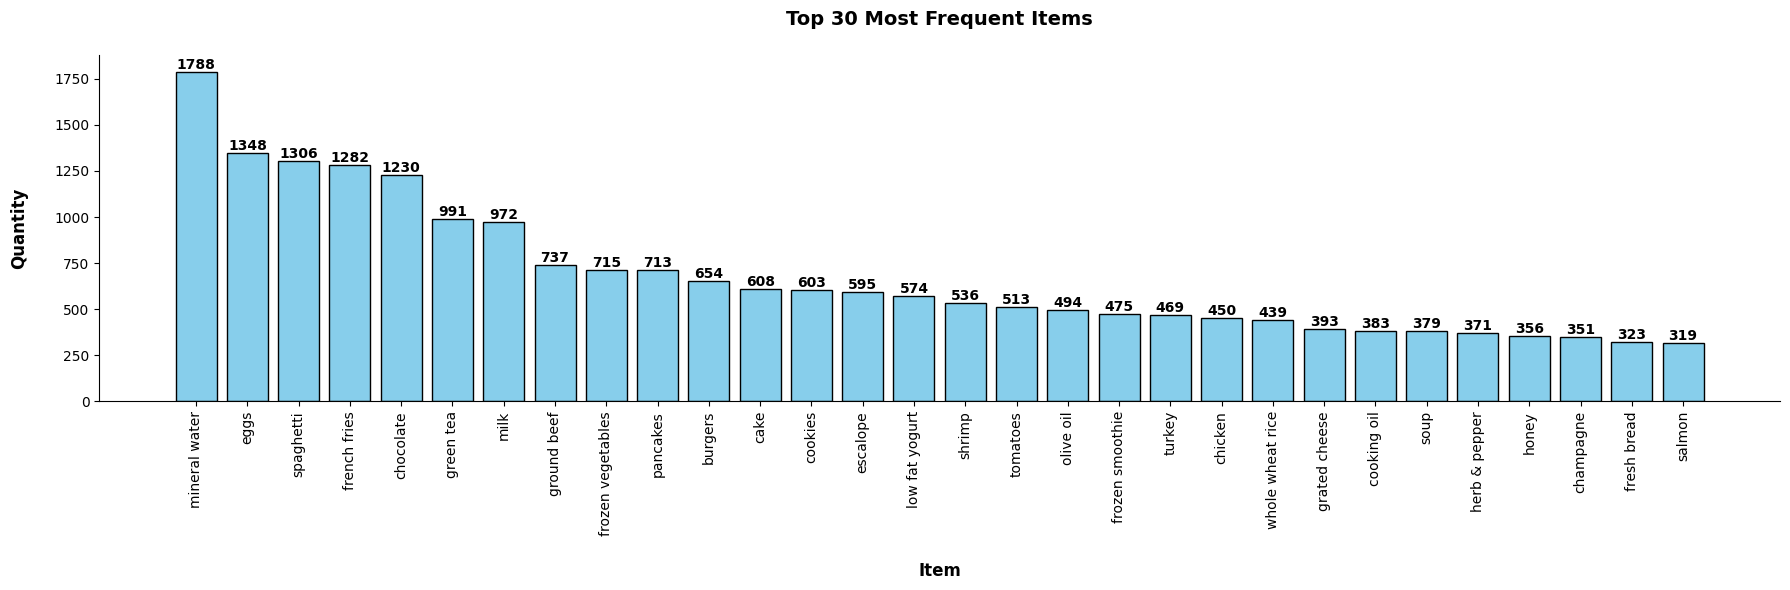

In [16]:
# Create the countplot to display top 30 most frequent items
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(18, 6))
plt.bar(data=df_top_items.head(30), x="Item", height="Count", edgecolor="black", color="skyblue")
ax.bar_label(ax.containers[0], fontsize=10, fontweight=600)
plt.title("Top 30 Most Frequent Items\n", fontsize=14, fontweight=700)
plt.xlabel("\nItem", fontsize=12, fontweight=700)
plt.ylabel("Quantity\n", fontsize=12, fontweight=700)
plt.xticks(rotation=90)
plt.gca().grid(False)
plt.gca().spines[["left", "bottom"]].set_color("black")
plt.gca().spines[["right", "top"]].set_visible(False)
plt.gca().set_facecolor("white")
plt.tight_layout()
plt.show()

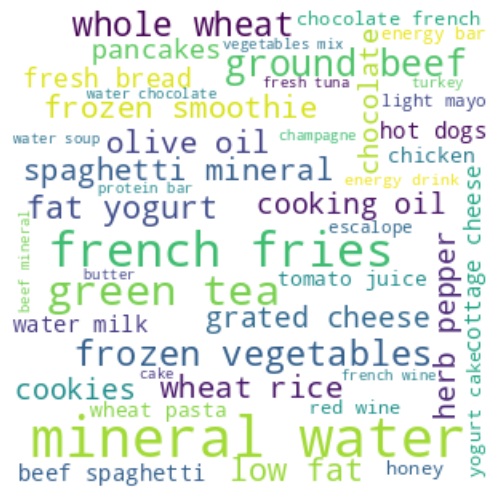

In [17]:
# Create the word cloud to visualize frequent items
from wordcloud import WordCloud

# Combine Item values into a string with space separator
all_values = [item for txn in txns for item in txn]
all_values_list = ' '.join(all_values)

# Create a word cloud object
wordcloud = WordCloud(width=300, height=300, background_color="white", min_font_size=8, colormap='viridis').generate(all_values_list)

# Display the word cloud
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

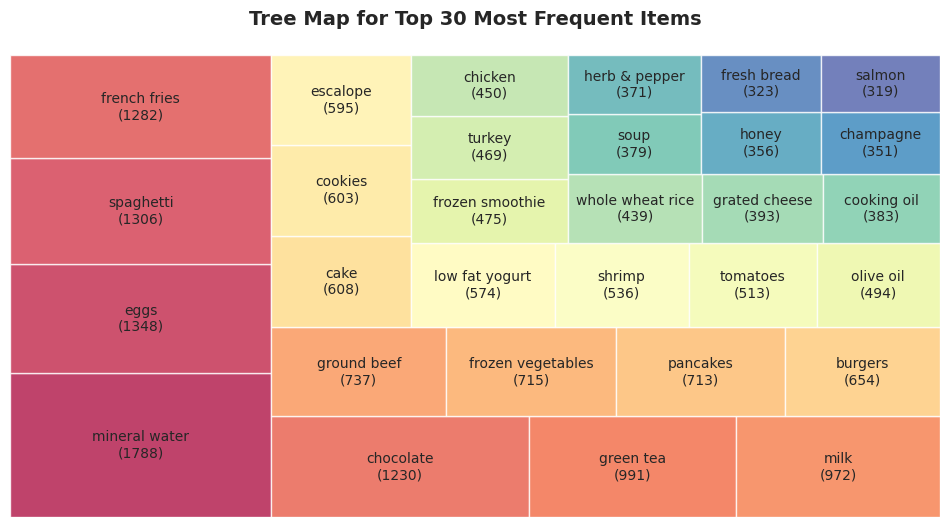

In [18]:
# Create the tree map to display top 30 most frequent items
import seaborn as sns
sns.set_style("whitegrid")
import squarify

# Convert 'Count' column to integers
df_top_items['Count'] = df_top_items['Count'].astype(int)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Top 30 items
df_top_30items = df_top_items.head(30)

# Calculate treemap sizes
sizes = df_top_30items['Count']

# Calculate treemap labels
labels = [f"{item}\n({count})" for item, count in zip(df_top_30items['Item'], df_top_30items['Count'])]

# Plot the treemap
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=sns.color_palette("Spectral", len(df_top_30items)), text_kwargs={'fontsize':10}, ax=ax)

plt.axis('off')
plt.title("Tree Map for Top 30 Most Frequent Items\n", fontsize=14, fontweight=700)
plt.show()

In [19]:
# Generate frequent itemsets
from mlxtend.frequent_patterns import apriori

# Applying Apriori algorithm assuming an item has to appear in at least 4% of the total transaction to be considered as frequent
min_support_threshold = 0.04
frequent_itemsets = apriori(df1, min_support=min_support_threshold, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.046794,(champagne)
3,0.059992,(chicken)
4,0.163845,(chocolate)
5,0.080389,(cookies)
6,0.051060,(cooking oil)
7,0.179709,(eggs)
8,0.079323,(escalope)
9,0.170911,(french fries)


The most frequent individual items are mineral water (23.84%), eggs (17.97%), and spaghetti (17.41%). There are also five frequent itemsets with two items e.g. (chocolate, mineral water) with a support of 5.27%, indicating that these items often appear together in transactions.

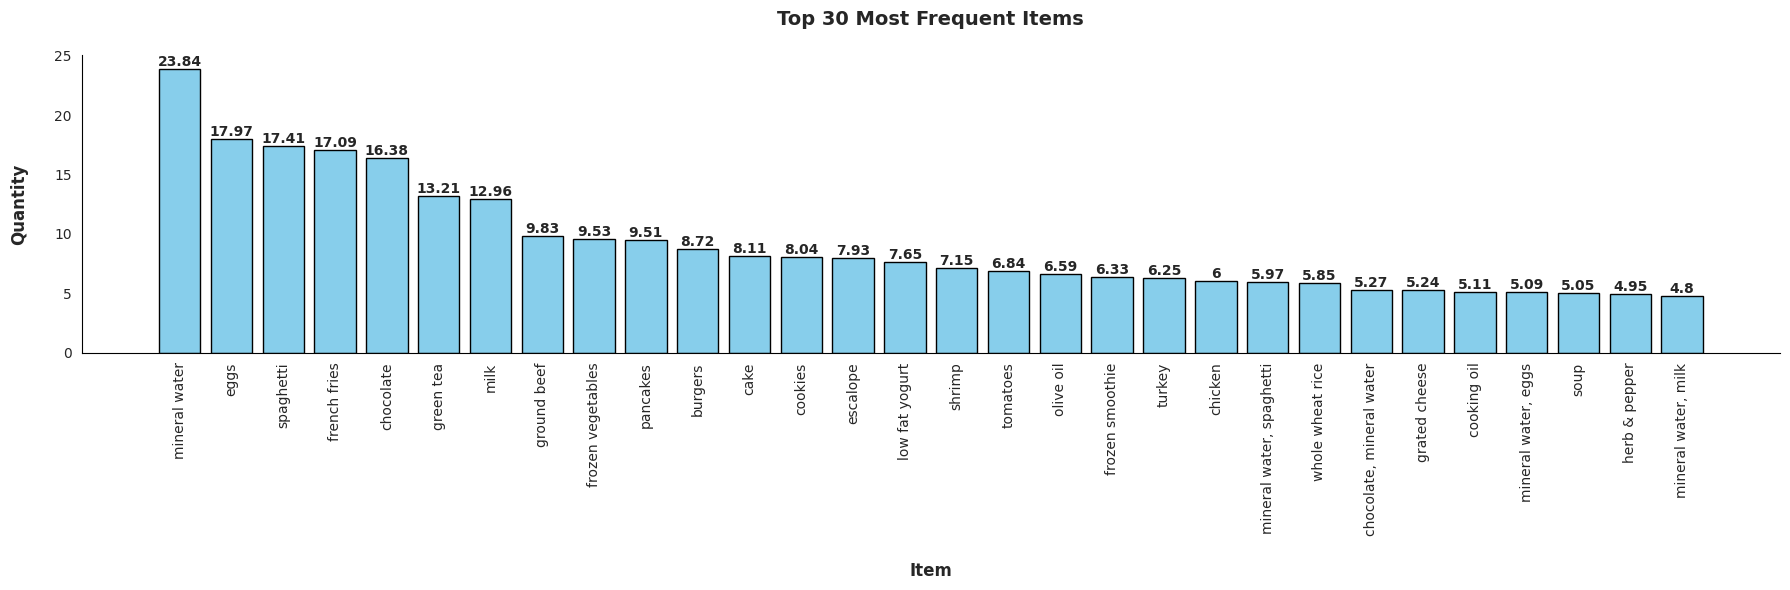

In [20]:
# Create the countplot for top 30 most frequent itemsets
import matplotlib.pyplot as plt

# Convert frozensets to strings and remove 'frozenset' from the representation
frequent_itemsets['itemset'] = frequent_itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))

# Sort and filter top 15 most frequent itemsets
freq_sorted = frequent_itemsets.sort_values(by="support", ascending=False)
freq_sorted_top30 = freq_sorted.head(30)
freq_sorted_top30["support %"] = (freq_sorted_top30["support"]*100).round(2)

fig, ax = plt.subplots(figsize=(18, 6))
plt.bar(data=freq_sorted_top30, x="itemset", height="support %", edgecolor="black", color="skyblue")
ax.bar_label(ax.containers[0], fontsize=10, fontweight=600)
plt.title("Top 30 Most Frequent Items\n", fontsize=14, fontweight=700)
plt.xlabel("\nItem", fontsize=12, fontweight=700)
plt.ylabel("Quantity\n", fontsize=12, fontweight=700)
plt.xticks(rotation=90)
plt.gca().grid(False)
plt.gca().spines[["left", "bottom"]].set_color("black")
plt.gca().spines[["right", "top"]].set_visible(False)
plt.gca().set_facecolor("white")
plt.tight_layout()
plt.show()

In [21]:
# Generate association rules from the frequent itemsets assuming the likelihood of purchasing the antecedent, followed by the consequent has to be at least 30% to be considered significant or interesting 
from mlxtend.frequent_patterns import association_rules
confidence_threshold = 0.3 
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_threshold)

# Sorting rules by confidence, support, and lift
sorted_rules = rules.sort_values(['confidence', 'support', 'lift'], ascending=[False, False, False])
sorted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369
2,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650,0.409465
3,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965


Customers who purchase ground beef are 41.66% likely to also purchase mineral water and this association is supported by a lift value of 1.75, which signifies that these items are frequently bought together. Similiar observations were found for some other items - milk, spaghetti, and chocolate, in association with mineral water. To visualize association rules, we can leverage the scatter plots, network graphs, heatmaps, and bar charts to understand their distribution within the dataset and their strength of association.

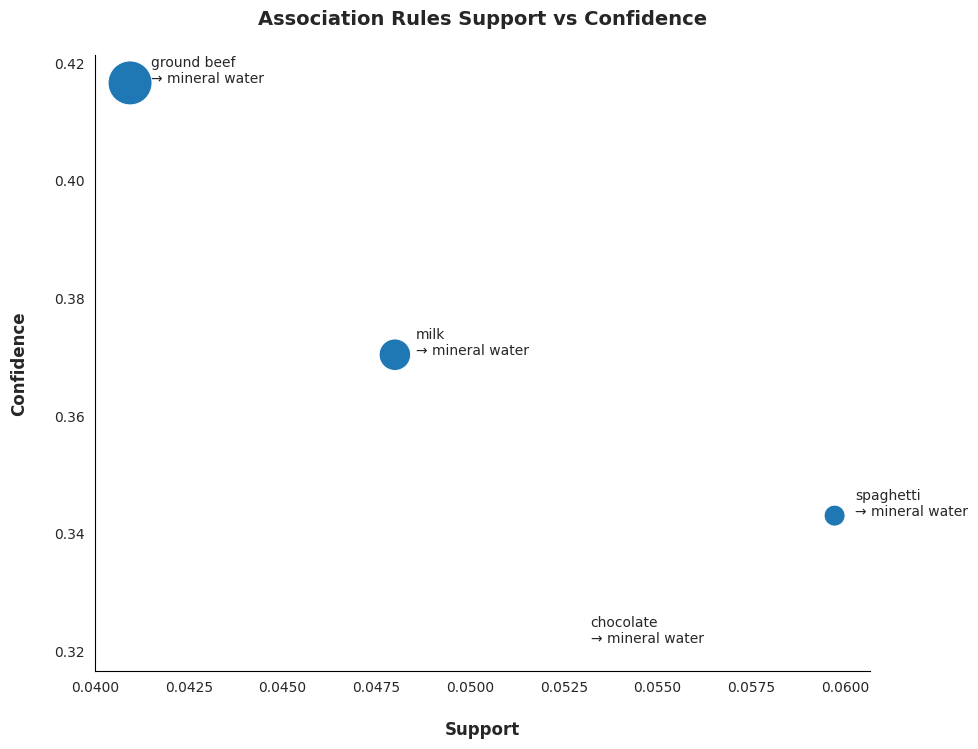

In [22]:
# Create a scatterplot to visualize the relationship between support and confidence in association rules
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=sorted_rules, x=sorted_rules["support"], y=sorted_rules["confidence"], size="confidence", sizes=(0, 1000), legend=False)

# Annotate the points with labels
for i, row in sorted_rules.iterrows():
    # Convert frozenset to list, then to string and remove the frozenset and other unwanted characters
    antecedents = ', '.join(list(row['antecedents']))
    consequents = ', '.join(list(row['consequents']))
    label = f"{antecedents}\n→ {consequents}" # \nSupport: {row['support']:.3f}, Confidence: {row['confidence']:.3f}"
    plt.annotate(label, (row['support'], row['confidence']), textcoords="offset points", xytext=(15, 0), ha='left', fontsize=10)
plt.title("Association Rules Support vs Confidence\n", fontsize=14, fontweight=700)
plt.xlabel("\nSupport", fontsize=12, fontweight=700)
plt.ylabel("Confidence\n", fontsize=12, fontweight=700)
plt.gca().grid(False)
plt.gca().spines[["left", "bottom"]].set_color("black")
plt.gca().spines[["right", "top"]].set_visible(False)
plt.gca().set_facecolor("white")
plt.show()

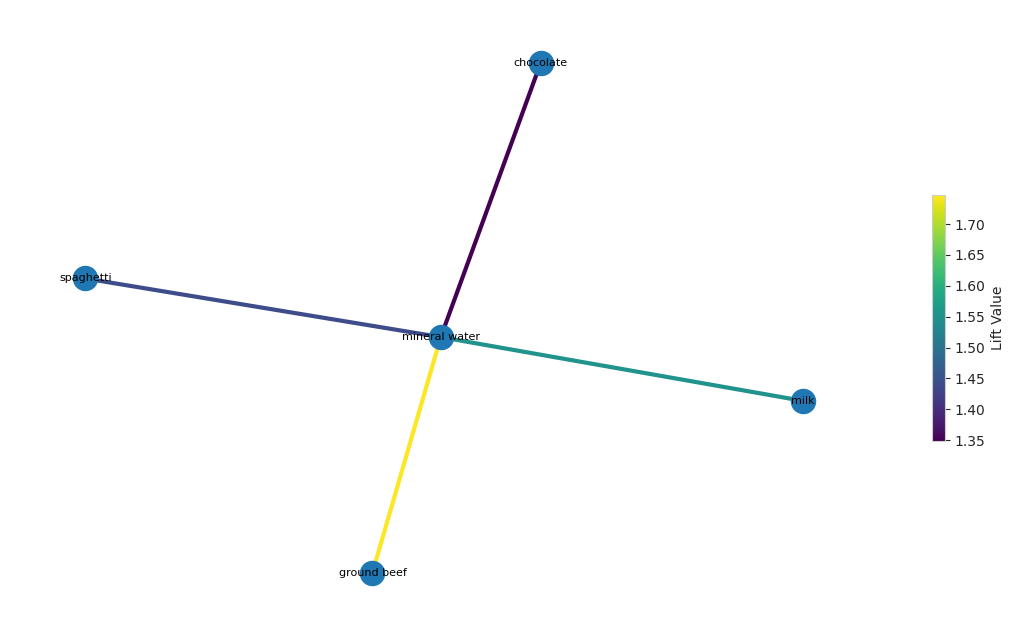

In [23]:
# Create a network graph to visualize the characteristics of the association rules
import networkx as nx
import matplotlib.cm as cm
from matplotlib.cm import get_cmap
import matplotlib.colors as mcolors
import warnings
warnings.filterwarnings("ignore", category=Warning)

# Create a graph
G = nx.Graph()

for _, row in rules.iterrows():
    # Convert frozenset to string
    antecedents_str = ', '.join(list(row['antecedents']))
    consequents_str = ', '.join(list(row['consequents']))
    
    # Add nodes and edges with the string labels
    G.add_node(antecedents_str)
    G.add_node(consequents_str)
    G.add_edge(antecedents_str, consequents_str, weight=row['lift'])

colormap = get_cmap('viridis')
lift_values = [data["weight"] for _, _, data in G.edges(data=True)]
lift_min = min(lift_values)
lift_max = max(lift_values)
lift_norm = mcolors.Normalize(vmin=lift_min, vmax=lift_max)

# Define edge colors and widths based on lift values
edge_colors = lift_values
edge_widths = 3

# Plot the graph
fig, ax = plt.subplots(figsize=(14, 8))
pos = nx.spring_layout(G, k=0.15, iterations=20)
nx.draw_networkx_nodes(G, pos, node_color="azure", node_size=50)
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw(G, pos, edge_color=edge_colors, width=edge_widths, edge_cmap=colormap, edge_vmin=lift_min, edge_vmax=lift_max)
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=colormap, norm=lift_norm), ax=ax, shrink=0.4)
cbar.set_label("Lift Value")

plt.axis("off")
plt.show()

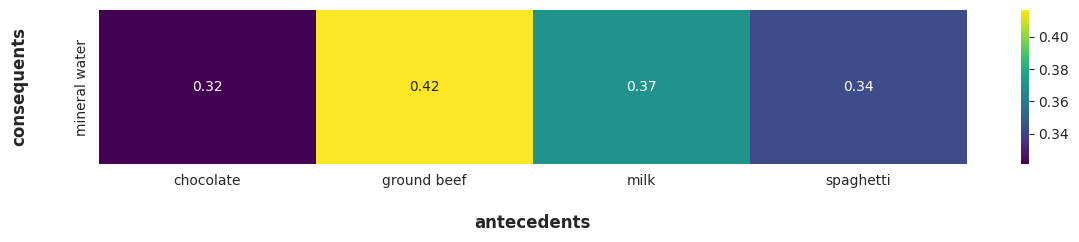

In [24]:
# Create a heatmap to visualize the relationships between the antecedents and consequents
# Convert frozensets to strings and remove 'frozenset' from the representation
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Show frequency or strength of item associations
pivot_table = rules.pivot(index="consequents", columns="antecedents", values="confidence")
plt.figure(figsize=(14, 2))
sns.heatmap(pivot_table, annot=True, cmap="viridis")
plt.xlabel("\nantecedents", fontsize=12, fontweight=600)
plt.ylabel("consequents\n\n", fontsize=12, fontweight=600)
plt.gca().set_facecolor("white")
plt.show()

#### **Summary**
- Mineral water is a frequent consequent, suggesting it is commonly bought with many different items.<br><p>
- The strongest association rule based on confidence is (ground beef) -> (water) with a confidence of about 0.42, meaning that when ground beef is bought, water is also likely to be bought in 42% of the cases.<br><p>
- Milk, chocolate, and spaghetti also have strong associations with mineral water, with confidence levels above 32%.

## **Eclat Algorithm**
---
The Eclat (Equivalence Class Transformation) algorithm is another classic data mining algorithm used for mining frequent itemsets and discovering association rules in a database. It differs from the Apriori algorithm in terms of its methodology and efficiency. This page aims to provide an overview of the Eclat algorithm, its method, key parameters, advantages, limitations, and a basic implementation guide using Python.

The Eclat algorithm employs a depth-first search strategy to find frequent itemsets in a dataset. Instead of generating candidate itemsets as in Apriori, Eclat uses a **vertical data format to represent transactions**. It maintains an index structure, often called the **tidset**, which records the transactions in which each item appears. Eclat then recursively combines frequent itemsets by **intersecting their tidsets**. This approach scans the database only once, eliminates the need for candidate generation, making it efficient for mining frequent itemsets in large databases.

### **Key Parameters**
| **Parameter**             | **Description**                                                               |
|:--------------------------|:------------------------------------------------------------------------------|
| `min_support`             | User-defined threshold (a decimal between 0 and 1) that determines the minimum frequency at which an itemset must be present in the dataset to be considered 'frequent'.|
| `min_combination`    | User-defined minimum size of the itemsets to be considered frequent.<br><br>Setting a higher value for `min_combination` will result in the algorithm only considering larger itemsets as frequent. This can lead to discovering fewer but potentially more significant association rules or patterns. It filters out smaller itemsets, which may include common but less interesting associations.<br><br> Setting a lower value for `min_combination` allows the algorithm to find smaller frequent itemsets. This can lead to a larger number of discovered itemsets, including more specific and potentially noise patterns. It may be useful for finding fine-grained associations but can also result in a higher volume of results to analyze.|
| `max_combination`          | User-defined maximum size of the itemsets to be considered.<br><br>Setting a higher value for `max_combination` allows the algorithm to consider larger itemsets as frequent. This can be useful when you have prior knowledge that certain associations or patterns involve a larger number of items. However, it may also increase computational complexity and runtime.<br><br>Setting a lower value for `max_combination` limits the size of itemsets considered by the algorithm. It can lead to faster execution and a smaller number of results, focusing on more concise patterns. However, you might miss associations that involve larger sets of items.|

In [25]:
# Install the pyECLAT library
!pip install pyECLAT

In [26]:
# Load dataset and view first 5 rows
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
warnings.filterwarnings("ignore", category=Warning)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

df = pd.read_csv("/kaggle/input/market-basket-optimisation/Market_Basket_Optimisation.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# View shape of the dataset
print(f"The dataset contains {df.shape[0]} transactions and each transaction has a maximum of {df.shape[1]} items or less.")

The dataset contains 7501 transactions and each transaction has a maximum of 20 items or less.


In [28]:
# Generate transaction lists
txns = df.fillna("").values.tolist()
txns = [[item for item in txn if item != ''] for txn in txns]
txns = [[item.strip() for item in txn] for txn in txns]

# Create a list of unique ids for the transactions
ids = [i + 1 for i in range(len(txns))]

# Initialize an empty list
data =[]
# Iterate through transactions and add them to the DataFrame with IDs
for i, txn in enumerate(txns):
    data.extend([{'TID': ids[i], 'Item': item} for item in txn])

df_txn = pd.DataFrame(data)
df_txn.head(25)

,TID,Item
0,1,shrimp
1,1,almonds
2,1,avocado
3,1,vegetables mix
4,1,green grapes
5,1,whole weat flour
6,1,yams
7,1,cottage cheese
8,1,energy drink
9,1,tomato juice


In [29]:
# Find the top 30 most frequent items
top_items = df_txn['Item'].value_counts().reset_index()

# Convert the top 30 items into DataFrame and sort by item count in descending order
df_top_items = pd.DataFrame(top_items)
df_top_items.columns = ['Item', 'Count']

# Calculate the percentage of transactions for each item
total_transactions = len(df)
df_top_items['% Count'] = (df_top_items['Count']*100 / total_transactions).round(2)

# Display the results
df_top_items.style.background_gradient(cmap='Blues')

,Item,Count,% Count
0,mineral water,1788,23.840000
1,eggs,1348,17.970000
2,spaghetti,1306,17.410000
3,french fries,1282,17.090000
4,chocolate,1230,16.400000
5,green tea,991,13.210000
6,milk,972,12.960000
7,ground beef,737,9.830000
8,frozen vegetables,715,9.530000
9,pancakes,713,9.510000


In [30]:
# Import the pyECLAT library
from pyECLAT import ECLAT

# Initiate an Eclat instance and load transactions DataFrame to the instance
eclat = ECLAT(data=df, verbose=True)

# Generate a binary dataframe
eclat.df_bin.head()

100%|██████████| 120/120 [00:00<00:00, 2402.59it/s]


,pancakes,cereals,ketchup,toothpaste,green tea,whole wheat pasta,candy bars,zucchini,fresh tuna,cottage cheese,cider,light cream,pet food,white wine,corn,energy drink,oatmeal,protein bar,oil,burgers,energy bar,eggplant,ground beef,extra dark chocolate,brownies,red wine,hand protein bar,turkey,yogurt cake,chocolate bread,melons,fresh bread,ham,napkins,cooking oil,bramble,spaghetti,chutney,nonfat milk,salt,cookies,gluten free bar,salmon,cauliflower,pasta,hot dogs,honey,green grapes,yams,whole wheat rice,fromage blanc,chili,cake,olive oil,salad,soup,mineral water,frozen vegetables,mint green tea,shampoo,escalope,water spray,grated cheese,sandwich,shallot,carrots,burger sauce,milk,chicken,body spray,dessert wine,asparagus,sparkling water,chocolate,strawberries,mayonnaise,herb & pepper,rice,strong cheese,mint,avocado,spinach,tea,vegetables mix,mashed potato,magazines,tomato juice,barbecue sauce,gums,light mayo,bug spray,pepper,bacon,eggs,whole weat flour,tomatoes,soda,meatballs,butter,mushroom cream sauce,shrimp,pickles,babies food,french wine,muffins,parmesan cheese,antioxydant juice,black tea,champagne,almonds,frozen smoothie,flax seed,cream,blueberries,french fries,green beans,low fat yogurt,clothes accessories,asparagus,tomato sauce
0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
# Display a list with all the names of the different items
unique_item_list = eclat.uniq_ 
print(unique_item_list)

['pancakes', 'cereals', 'ketchup', 'toothpaste', 'green tea', 'whole wheat pasta', 'candy bars', 'zucchini', 'fresh tuna', 'cottage cheese', 'cider', 'light cream', 'pet food', 'white wine', 'corn', nan, 'energy drink', 'oatmeal', 'protein bar', 'oil', 'burgers', 'energy bar', 'eggplant', 'ground beef', 'extra dark chocolate', 'brownies', 'red wine', 'hand protein bar', 'turkey', 'yogurt cake', 'chocolate bread', 'melons', 'fresh bread', 'ham', 'napkins', 'cooking oil', 'bramble', 'spaghetti', 'chutney', 'nonfat milk', 'salt', 'cookies', 'gluten free bar', 'salmon', 'cauliflower', 'pasta', 'hot dogs', 'honey', 'green grapes', 'yams', 'whole wheat rice', 'fromage blanc', 'chili', 'cake', 'olive oil', 'salad', 'soup', 'mineral water', 'frozen vegetables', 'mint green tea', 'shampoo', 'escalope', 'water spray', 'grated cheese', 'sandwich', 'shallot', 'carrots', 'burger sauce', 'milk', 'chicken', 'body spray', 'dessert wine', 'asparagus', 'sparkling water', 'chocolate', 'strawberries', 'ma

In [32]:
# Generate frequent itemsets
# Applying Eclat algorithm assuming an item has to appear in at least 4% of the total transaction to be considered as frequent and a frequent itemset should contain at least 1 item and a maximum of 3 items
min_support_threshold = 0.04
min_combination = 2
max_combination = 3

get_ECLAT_indexes, get_ECLAT_supports = eclat.fit(min_support = min_support_threshold, min_combination = min_combination, max_combination = max_combination, separator=' & ', verbose=True)

# Display results in a dataframe
result = pd.DataFrame(get_ECLAT_supports.items(),columns=['Item', 'Support'])
result = result.sort_values(by=['Support'], ascending=False).reset_index(drop=True)
result

Combination 2 by 2


435it [00:02, 147.48it/s]


Combination 3 by 3


4060it [00:29, 138.86it/s]


,Item,Support
0,spaghetti & mineral water,0.059725
1,mineral water & chocolate,0.052660
2,mineral water & eggs,0.050927
3,mineral water & milk,0.047994
4,ground beef & mineral water,0.040928


#### **Summary**
- The top 5 items with the highest support values are: mineral water (23.84%), eggs (17.97%), spaghetti (17.41%), french fries (17.09%), and chocolate (16.38%).<br><p>
- The least frequent items are fresh bread (4.31%), salmon (4.25%), and ground beef & mineral water (4.09%).<br><p>
- Some interesting itemsets with relatively high support include mineral water & spaghetti (5.97%), chocolate & mineral water (5.27%), and eggs & mineral water (5.09%).

## **FP-Growth Algorithm**
---
The FP-growth (Frequent Pattern growth) algorithm is another popular algorithm for discovering frequent itemsets and association rules. It offers advantages over both Apriori and Eclat in terms of efficiency and scalability. This page aims to provide an overview of the FP-growth algorithm, its method, key parameters, advantages, limitations, and a basic implementation guide using Python.


The FP-growth algorithm employs a divide-and-conquer strategy to discover frequent itemsets. It constructs a tree-like data structure known as the **FP-tree (Frequent Pattern tree)** from the transaction database. This tree structure compactly represents the frequent patterns and their support counts. FP-growth then **recursively mines the tree to find frequent itemsets**. Unlike Apriori, FP-growth does not generate candidate itemsets explicitly, which makes it faster and more memory-efficient, especially for large datasets. In addition, there is also a **header table**, alongside the FP-tree that stores pointers to the first occurrence of each item in the FP-tree. This speeds up the process of finding frequent itemsets.

### **Key Parameters**
| **Parameter**             | **Description**                                                               |
|:--------------------------|:------------------------------------------------------------------------------|
| `min_support`             | This is the user-defined threshold (a decimal between 0 and 1) that determines the minimum frequency at which an itemset must be present in the dataset to be considered 'frequent'.|
| `confidence_threshold`    | This is the user-defined minimum level of confidence that an association rule must exceed to be considered significant.
| `lift_threshold`          | This is the user-defined minimum lift value (typically >1) focusing on rules that have a positive relationship between the antecedent and consequent.|


In [33]:
# Load dataset and view first 5 rows
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
warnings.filterwarnings("ignore", category=Warning)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

df = pd.read_csv("/kaggle/input/market-basket-optimisation/Market_Basket_Optimisation.csv", header=None, index_col=None, names=[f"Item_{i}" for i in range(1, 21)])
df.head()

,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,Item_8,Item_9,Item_10,Item_11,Item_12,Item_13,Item_14,Item_15,Item_16,Item_17,Item_18,Item_19,Item_20
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# View shape of the dataset
print(f"The dataset contains {df.shape[0]} transactions and each transaction has a maximum of {df.shape[1]} items or less.")

The dataset contains 7501 transactions and each transaction has a maximum of 20 items or less.


In [35]:
# View shape of the dataset
print(f"The dataset contains {df.shape[0]} transactions and each transaction has a maximum of {df.shape[1]} items or less.")

The dataset contains 7501 transactions and each transaction has a maximum of 20 items or less.


In [36]:
# Generate transaction lists
txns = df.fillna("").values.tolist()
txns = [[item for item in txn if item != ''] for txn in txns]
txns = [[item.strip() for item in txn] for txn in txns]

# Create a list of unique ids for the transactions
ids = [i + 1 for i in range(len(txns))]

# Initialize an empty list
data =[]
# Iterate through transactions and add them to the DataFrame with IDs
for i, txn in enumerate(txns):
    data.extend([{'TID': ids[i], 'Item': item} for item in txn])

df_txn = pd.DataFrame(data)
df_txn.head(25)

,TID,Item
0,1,shrimp
1,1,almonds
2,1,avocado
3,1,vegetables mix
4,1,green grapes
5,1,whole weat flour
6,1,yams
7,1,cottage cheese
8,1,energy drink
9,1,tomato juice


In [37]:
# Perform one hot encoding using TransactionEncoder
from mlxtend.preprocessing import TransactionEncoder

# Create a TransactionEncoder
te = TransactionEncoder()

# Fit and transform the transaction data
te_array = te.fit(txns).transform(txns)

# Extract the column names
te_columns = te.columns_

# Create a DataFrame from the one-hot encoded array
df1 = pd.DataFrame(te_array, columns=te.columns_)

# Display the results
df1.head()

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,escalope,extra dark chocolate,flax seed,french fries,french wine,fresh bread,fresh tuna,fromage blanc,frozen smoothie,frozen vegetables,gluten free bar,grated cheese,green beans,green grapes,green tea,ground beef,gums,ham,hand protein bar,herb & pepper,honey,hot dogs,ketchup,light cream,light mayo,low fat yogurt,magazines,mashed potato,mayonnaise,meatballs,melons,milk,mineral water,mint,mint green tea,muffins,mushroom cream sauce,napkins,nonfat milk,oatmeal,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [38]:
# Find the top most frequent items
top_items = df_txn['Item'].value_counts().reset_index()

# Convert the top items into DataFrame and sort by item count in descending order
df_top_items = pd.DataFrame(top_items)
df_top_items.columns = ['Item', 'Count']

# Calculate the percentage of transactions for each item
total_transactions = len(df)
df_top_items['% Count'] = (df_top_items['Count']*100 / total_transactions).round(2)

# Display the results
df_top_items.style.background_gradient(cmap='Blues')

,Item,Count,% Count
0,mineral water,1788,23.840000
1,eggs,1348,17.970000
2,spaghetti,1306,17.410000
3,french fries,1282,17.090000
4,chocolate,1230,16.400000
5,green tea,991,13.210000
6,milk,972,12.960000
7,ground beef,737,9.830000
8,frozen vegetables,715,9.530000
9,pancakes,713,9.510000


### **MLXTEND**

In [39]:
# Generate frequent itemsets
from mlxtend.frequent_patterns import fpgrowth

# Applying fpgrowth algorithm assuming an item has to appear in at least 4% of the total transaction to be considered as frequent
min_support_threshold = 0.04
fp_frequent_itemsets = fpgrowth(df1, min_support=min_support_threshold, use_colnames=True)
fp_frequent_itemsets

,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
5,0.063325,(frozen smoothie)
6,0.047460,(honey)
7,0.042528,(salmon)
8,0.179709,(eggs)
9,0.087188,(burgers)


The most frequent individual items are mineral water (23.84%), eggs (17.97%), and spaghetti (17.41%). There are also five frequent itemsets with two items e.g. (chocolate, mineral water) with a support of 5.27%, indicating that these items often appear together in transactions.

In [40]:
# Generate association rules from the frequent itemsets assuming the likelihood of purchasing the antecedent, followed by the consequent has to be at least 30% to be considered significant or interesting 
from mlxtend.frequent_patterns import association_rules
confidence_threshold = 0.3 
rules = association_rules(fp_frequent_itemsets, metric="confidence", min_threshold=confidence_threshold)

# Sorting rules by confidence, support, and lift
sorted_rules = rules.sort_values(['confidence', 'support', 'lift'], ascending=[False, False, False])
sorted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369
0,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650,0.409465
1,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
2,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965


Customers who purchase ground beef are 41.66% likely to also purchase mineral water and this association is supported by a lift value of 1.75, which signifies that these items are frequently bought together. Similiar observations were found for some other items - milk, spaghetti, and chocolate, in association with mineral water. To visualize association rules, we can leverage the scatter plots, network graphs, heatmaps, and bar charts to understand their distribution within the dataset and their strength of association.

### **FPGROWTH_PY**

In [41]:
# Install fpgrowth library
!pip install fpgrowth_py

In [42]:
# Load dataset and view first 5 rows
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
warnings.filterwarnings("ignore", category=Warning)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

df = pd.read_csv("/kaggle/input/market-basket-optimisation/Market_Basket_Optimisation.csv", header=None, index_col=None, names=[f"Item_{i}" for i in range(1, 21)])
df.head()

,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,Item_8,Item_9,Item_10,Item_11,Item_12,Item_13,Item_14,Item_15,Item_16,Item_17,Item_18,Item_19,Item_20
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# View shape of the dataset
print(f"The dataset contains {df.shape[0]} transactions and each transaction has a maximum of {df.shape[1]} items or less.")

The dataset contains 7501 transactions and each transaction has a maximum of 20 items or less.


In [44]:
# Generate transaction lists
txns = df.fillna("").values.tolist()
txns = [[item for item in txn if item != ''] for txn in txns]
txns = [[item.strip() for item in txn] for txn in txns]

# Create a list of unique ids for the transactions
ids = [i + 1 for i in range(len(txns))]

# Initialize an empty list
data =[]
# Iterate through transactions and add them to the DataFrame with IDs
for i, txn in enumerate(txns):
    data.extend([{'TID': ids[i], 'Item': item} for item in txn])

df_txn = pd.DataFrame(data)
df_txn.head(25)

,TID,Item
0,1,shrimp
1,1,almonds
2,1,avocado
3,1,vegetables mix
4,1,green grapes
5,1,whole weat flour
6,1,yams
7,1,cottage cheese
8,1,energy drink
9,1,tomato juice


In [45]:
# Generate frequent itemsets
from fpgrowth_py import fpgrowth

# Applying fpgrowth algorithm assuming an item has to appear in at least 4% of the total transaction to be considered as frequent
# Generate association rules from the frequent itemsets assuming the likelihood of purchasing the antecedent, followed by the consequent has to be at least 30% to be considered significant or interesting 
frequent_itemsets, rules = fpgrowth(txns, minSupRatio=0.04, minConf=0.3)
print(frequent_itemsets)
print(f"\n{rules}")

[{'salmon'}, {'fresh bread'}, {'champagne'}, {'honey'}, {'herb & pepper'}, {'soup'}, {'cooking oil'}, {'grated cheese'}, {'whole wheat rice'}, {'chicken'}, {'turkey'}, {'frozen smoothie'}, {'olive oil'}, {'tomatoes'}, {'shrimp'}, {'low fat yogurt'}, {'escalope'}, {'cookies'}, {'cake'}, {'burgers'}, {'pancakes'}, {'frozen vegetables'}, {'ground beef'}, {'mineral water', 'ground beef'}, {'milk'}, {'mineral water', 'milk'}, {'green tea'}, {'chocolate'}, {'chocolate', 'mineral water'}, {'french fries'}, {'spaghetti'}, {'mineral water', 'spaghetti'}, {'eggs'}, {'mineral water', 'eggs'}, {'mineral water'}]

[[{'ground beef'}, {'mineral water'}, 0.41655359565807326], [{'milk'}, {'mineral water'}, 0.37037037037037035], [{'chocolate'}, {'mineral water'}, 0.3213995117982099], [{'spaghetti'}, {'mineral water'}, 0.3430321592649311]]


In [46]:
# Convert each frequent_itemsets set to a string
freq_itemsets_str = [', '.join(list(itemset)) for itemset in frequent_itemsets]

# Create DataFrame
freq_itemsets_df = pd.DataFrame(freq_itemsets_str, columns=['Itemset'])
freq_itemsets_df

,Itemset
0,salmon
1,fresh bread
2,champagne
3,honey
4,herb & pepper
5,soup
6,cooking oil
7,grated cheese
8,whole wheat rice
9,chicken


In [47]:
# Convert rules to DataFrame
rules_df = pd.DataFrame(rules, columns=['Antecedent', 'Consequent', 'Confidence'])
rules_df = rules_df.sort_values(by="Confidence", ascending =False).reset_index(drop=True)
rules_df

,Antecedent,Consequent,Confidence
0,{ground beef},{mineral water},0.416554
1,{milk},{mineral water},0.370370
2,{spaghetti},{mineral water},0.343032
3,{chocolate},{mineral water},0.321400


#### **Summary**
- Mineral water is a frequent consequent, suggesting it is commonly bought with many different items.<br><p>
- The strongest association rule based on confidence is (ground beef) -> (water) with a confidence of about 0.42, meaning that when ground beef is bought, water is also likely to be bought in 42% of the cases.<br><p>
- Milk, chocolate, and spaghetti also have strong associations with mineral water, with confidence levels above 32%.

### **Overall Summary of Market Basket Analysis using Apriori, Eclat, and FP-Growth Algorithms**
---
- Mineral Water is frequently purchased in combination with a variety of other products, indicating its staple status in consumer transactions.<br>
- A strong association between ground beef and spaghetti is consistently observed, particularly highlighted in the Apriori and FP-Growth results with a confidence level of approximately 39.89%.<br>
- The tendency of customers purchasing soup along with mineral water is among the top rules in both Apriori and FP-Growth analyses, showing a confidence level of around 45.66%.<br>
- All three algorithms show a high degree of consistency in identifying key item associations and trends, particularly concerning the prominence of mineral water and the frequent pairing of The consistency in these results enhances the reliability of the findings and provides a solid foundation for applying these insights in practical retail and marketing scenarios.